# HW1

## b)

In [1]:
import numpy
import random
import matplotlib.pyplot as plt

from typing import Union
from scipy.optimize import minimize

In [2]:
seed = numpy.loadtxt("Seed.txt").item()
random.seed(seed)

In [3]:
EPS = 1e-12

def neg_log_likelihood(thetas: tuple[int, int], input: Union[numpy.ndarray, list]):
    mapping = {
        (0, 0): thetas[0], 
        (0, 1): 1 - thetas[0],
        (1, 1): thetas[1], 
        (1, 0): 1 - thetas[1]
    }

    neg_log_lik = 0 

    for i in range(len(input)-1):
        neg_log_lik -= numpy.log(mapping[(input[i], input[i+1])] + EPS)
    
    return neg_log_lik

In [4]:
input = numpy.loadtxt("Input.txt")

emp_null_theta_1 = []
emp_null_theta_2 = []
bounds = ((0, 1), (0, 1))

for i in range(1000):
    resampled = random.choices(input, k=len(input))
    theta_1_mle, theta_2_mle = minimize(fun=lambda thetas: neg_log_likelihood(thetas, resampled), x0 = [0.2, 0.2], bounds = bounds).x
    emp_null_theta_1.append(theta_1_mle)
    emp_null_theta_2.append(theta_2_mle)

obs_theta_1_mle, obs_theta_2_mle = minimize(fun=lambda thetas: neg_log_likelihood(thetas, input), x0 = [0.5, 0.5], bounds = bounds).x

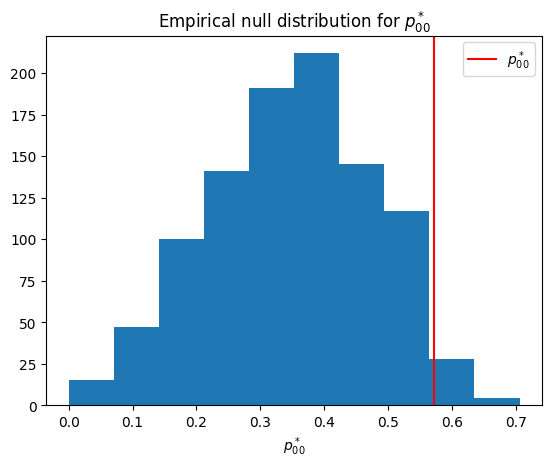

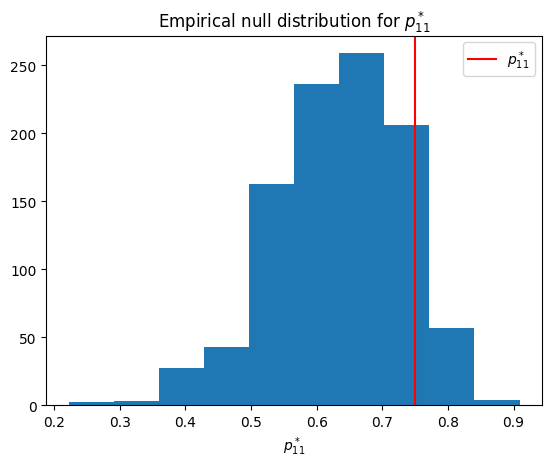

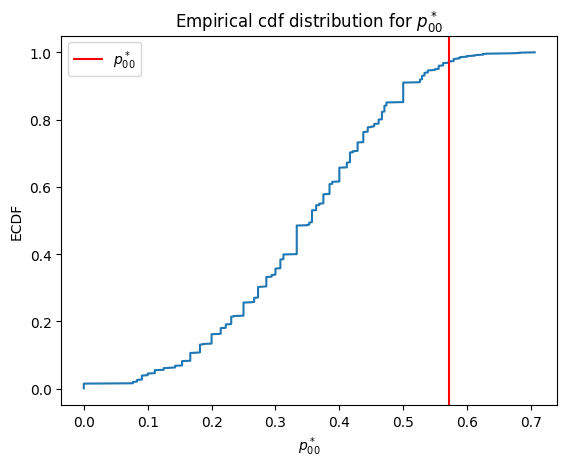

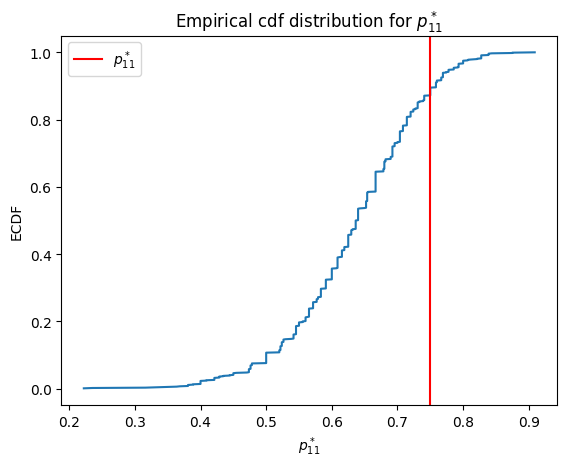

In [5]:
# null distribution for theta 1 (p_00)
plt.hist(emp_null_theta_1)
plt.title(r"Empirical null distribution for $p_{00}^*$")
plt.axvline(x = obs_theta_1_mle, color = "red", label=r"$p_{00}^*$")
plt.xlabel(r"$p_{00}^*$")
plt.legend()
plt.show()

# null distribution for theta 2 (p_11)
plt.hist(emp_null_theta_2)
plt.axvline(x = obs_theta_2_mle, color = "red", label=r"$p^*_{11}$")
plt.title(r"Empirical null distribution for $p^*_{11}$")
plt.xlabel(r"$p_{11}^*$")
plt.legend()
plt.show()

def ecdf(x):
    x = numpy.sort(x)
    y = numpy.arange(1, len(x) + 1) / len(x)
    return x, y

# empirical cdf for theta 1 (p_00)
x, y = ecdf(emp_null_theta_1)
plt.plot(x, y)
plt.title(r"Empirical cdf distribution for $p^*_{00}$")
plt.axvline(obs_theta_1_mle, color="red", label=r"$p^*_{00}$")
plt.xlabel(r"$p^*_{00}$")
plt.ylabel("ECDF")
plt.legend()
plt.show()

# empirical cdf for theta 2 (p_11)
x, y = ecdf(emp_null_theta_2)
plt.plot(x, y)
plt.title(r"Empirical cdf distribution for $p^*_{11}$")
plt.axvline(obs_theta_2_mle, color="red", label=r"$p^*_{11}$")
plt.xlabel(r"$p^*_{11}$")
plt.ylabel("ECDF")
plt.legend()
plt.show()

In [6]:
# p-value for our test of the hypothesis applied to p_00
p_val_p00 = sum(1 for b in emp_null_theta_1 if b > obs_theta_1_mle) / 1000


# p-value for our test of the hypothesis applied to p_11
p_val_p11 =  sum(1 for b in emp_null_theta_2 if b > obs_theta_2_mle) / 1000


speil = f"""For p_00, the empirical p-value of {p_val_p00} indicates that the observed transition probability is unlikely to arise from an i.i.d. sequence, providing evidence for a first-order Markov model. Assuming an alpha of 0.05 we reject our null of a simple coin flip model. 

For p_11, the empirical p-value of {p_val_p11} indicates that we do not have statistical significance, assuming an alpha of 0.05, to reject the null hypotesis that the data was generated via an simple coin flip model. 
"""

print(speil)

For p_00, the empirical p-value of 0.027 indicates that the observed transition probability is unlikely to arise from an i.i.d. sequence, providing evidence for a first-order Markov model. Assuming an alpha of 0.05 we reject our null of a simple coin flip model. 

For p_11, the empirical p-value of 0.108 indicates that we do not have statistical significance, assuming an alpha of 0.05, to reject the null hypotesis that the data was generated via an simple coin flip model. 



# HW2

## b)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def g(t, y, theta, x0=2):
    x = np.sin(theta * t) + x0
    return ((y - x)**2).sum()

def first_deriv_g(t, y, theta, x0=2):
    return (- 2 * (y - np.sin(theta * t) - x0) * np.cos(theta * t) * t).sum()

def second_deriv_g(t, y, theta, x0=2):
    return ( 2 * (y - np.sin(theta * t) - x0) * np.sin(theta * t) * (t**2) + 2 * (np.cos(theta * t)**2) * (t ** 2)).sum()

def theta_step(t, y, theta, x0=2):
    delta_theta = - first_deriv_g(t, y, theta, x0=2)/second_deriv_g(t, y, theta, x0=2)
    theta += delta_theta
    return theta

def run_newton_method(t, y, theta, x0=2, n_max=30, eps=10**(-8), is_save=False):
    if is_save:
        save(theta, how='w')
    for i in range(n_max):
        theta_new = theta_step(t, y, theta, x0=2)
        if abs(theta_new - theta) < eps:
            theta = theta_new
            break
        else:
            theta = theta_new
        if is_save:
            save(theta, how='a')
    return theta

def save(x, how='a', name='Exc7Task2a.txt'):
    with open(name, how) as f:
        f.write('%.3f\n' % x)

In [9]:
data = np.loadtxt('Data.txt', ndmin=2, converters = float, delimiter=",")
thetas = np.linspace(0, 20, 100)

In [10]:
g_vals = np.array([g(data[:, 0], data[:, 1], theta, x0=2).item() for theta in thetas])
g_prime_vals = np.array([first_deriv_g(data[:, 0], data[:, 1], theta, x0=2).item() for theta in thetas])
g_double_prime_vals = np.array([second_deriv_g(data[:, 0], data[:, 1], theta, x0=2).item() for theta in thetas])

In [11]:
# conditions for optimal value of g is that g' is 0 and g'' is positive

# find the positions where the first derivative intersects the x axis
# i think the easiest way to do this is to find where the sign flips between successive value of g'
# i take the first index out of the sign flip arbitrarily 
zero_crossings_idx = np.where(
    np.sign(g_prime_vals[:-1]) != np.sign(g_prime_vals[1:])
)[0]

# find the idx for which g'' is also positive
minima_idx = zero_crossings_idx[g_double_prime_vals[zero_crossings_idx] > 0]

# all minima; including local and global
print(
    "All optima are:",
    np.array2string(np.array(g_vals)[minima_idx], precision=3, separator=", "),
)

# theta values corresponding to all optima
print(
    "Respectively, the theta values corresponding to all optima are:",
    np.array2string(thetas[minima_idx], precision=3, separator=", "),
)


All optima are: [ 0.307,  9.104, 10.547, 10.972]
Respectively, the theta values corresponding to all optima are: [ 2.626,  9.697, 12.525, 15.152]


In [12]:
index = np.argmin(np.array(g_vals)[minima_idx])

In [13]:
global_min = np.array(g_vals)[minima_idx][index]
global_min_theta = thetas[minima_idx][index]

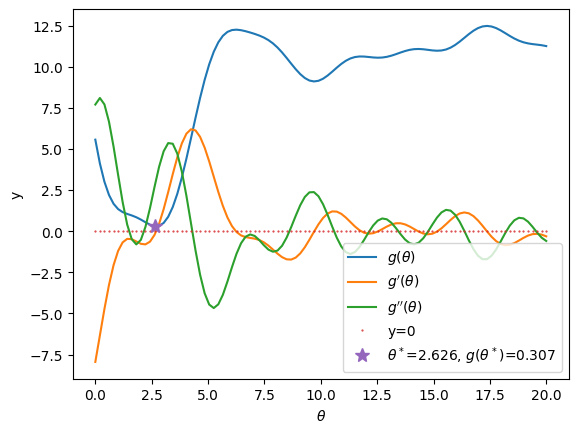

In [14]:
plt.plot(thetas, g_vals, label=r'$g(\theta)$')
plt.plot(thetas, g_prime_vals, label=r'$g^{\prime}(\theta)$')
plt.plot(thetas, g_double_prime_vals, label=r'$g^{\prime \prime}(\theta)$')
plt.plot(thetas, [0]*len(thetas), '.', label='y=0', markersize=1)

plt.plot(global_min_theta, 
         global_min, 
         '*', 
         label=r'$\theta^*$=%.3f, $g(\theta^*)$=%.3f' 
         % (global_min_theta, 
             global_min), 
         markersize=10)

plt.xlabel(r'$\theta$')
plt.ylabel('y')
plt.legend()



## c)

In [15]:
def model(t, theta, x0=2):
    return np.sin(theta * t) + x0

In [16]:
pred = model(data[:, 0], global_min_theta)

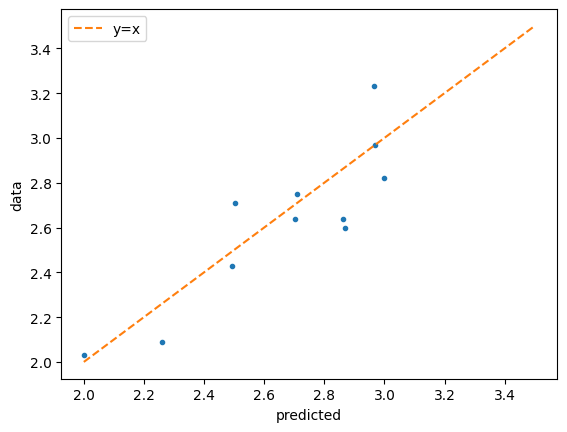

In [17]:
plt.plot(pred, data[:, 1], '.')
plt.plot(np.linspace(2, 3.5, 10), np.linspace(2, 3.5, 10), '--', label='y=x')
plt.xlabel('predicted')
plt.ylabel('data')
plt.legend()

According to the comparison, it seems that the Newton method is not guaranteed to provide the global optimal
parameter as the result from the Newton method function differ from the parameter corresponding to the global minumum value:

In [18]:
n_max = 30
eps = 10**(-8)
theta = 3

result = run_newton_method(data[:, 0], data[:, 1], theta, x0=2, n_max=n_max, eps=eps).item()

In [19]:
print('Newton method: %f\nGlobal minimum value parameter for the objective function: %f' % (result, global_min_theta))

Newton method: 2.702120
Global minimum value parameter for the objective function: 2.626263


Additionally, it is important to correctly initialize the Newton method function, otherwise it would give the parameter associated with the local, not global minimum.

In [20]:
theta_start = 10
run_newton_method(data[:, 0], data[:, 1], theta_start, x0=2, n_max=n_max, eps=eps).item()

9.711984372034813

# HW3

$y_i = x_{i|\theta} + \eta_i$ and $\eta_i \sim Norm(0, \sigma_i^2)$

<br>
<br>

$L(y_i | \theta) = \prod_{i=1}^n p(y_i| \theta)$ 

where $p(y_i| \theta) = \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp(\frac{-(y_i - x_{i|\theta})^2}{2 \sigma_i^2})$

<br>
<br>

$L(y_i | \theta) = \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp(\frac{-(y_i - x_{i|\theta})^2}{2 \sigma_i^2}) = \frac{1}{(2 \pi)^{\frac{n}{2}} \sigma_1 \cdot ... \cdot \sigma_n} \exp (- \sum_{i=1}^n \frac{(y_i - x_{i|\theta})^2}{2 \sigma_i^2})$


$l(y_i | \theta) = \log L (y_i | \theta) = \underset{constant} {\frac{n}{2} \log(\frac{1}{2 \pi})} - \underset{no\, \theta} {\sum_{i=1}^n \log (\sigma_i)} - \underset{2 \, is \, a \, constant}{\sum_{i=1}^n \frac{(y_i - x_{i | \theta})^2}{2 \sigma_i^2}} $

As $\theta^* = \underset{\theta} {\arg \min}(-l(y_i | \theta))$

Therefore

As $\theta^* = \underset{\theta} {\arg \min}(\sum_{i=1}^n \frac{(y_i - x_{i|\theta})^2}{\sigma_i^2})$

The objective function is $g(\theta) = \sum_{i=1}^n \frac{(y_i - x_{i|\theta})^2}{\sigma_i^2}$

# HW4

$N=2$

$t=(1, 3)$

$y=(6, 7)$

$(\theta_1, \theta_2)^\top = (1, 1)$

$x_i = \theta_1 e^{\theta_2 t_i}$

$g(\theta) = \sum_{i=1}^N (x_{i|\theta} - y_i)^2 = \sum_{i=1}^N (\theta_1 e^{\theta_2 t_i} - y_i)^2$

$\frac{dg(\theta)}{d\theta1} = 2 \sum_{i=1}^N (\theta_1 e^{\theta_2 t_i} - y_i) e^{\theta_2 t_i} =  2 \sum_{i=1}^N (1 e^{1 t_i} - y_i) e^{ t_i} = 2 (e - 6) e + 2 (e^3 - 7) e^3$

$\frac{dg(\theta)}{d\theta2} = 2 \sum_{i=1}^N (\theta_1 e^{\theta_2 t_i} - y_i) e^{\theta_2 t_i} \theta_1 t_i = 2 \sum_{i=1}^N ( e^{ t_i} - y_i) e^{ t_i} t_i = 2 e (e - 6) + 6  e^3 (e^3 - 7)$

$\frac{d^2 g(\theta)}{d \theta_1^2} = 2 \sum_{i=1}^N e^{\theta_2 t_i} = 2 e^2 + 2 e^{2 \cdot 3} = 2 (e^2 + e^6)$

$\frac{d^2 g(\theta)}{d \theta_1 d \theta_2} = 2 \sum_{i=1}^N (\theta_1 e^{2 \theta_2 t_i} 2 t_i - y_i e^{\theta_2 t_i} t_i )= 2 \sum_{i=1}^N (1 e^{2 t_i} 2 t_i - y_i e^{1 t_i} t_i) = 2 (2 e^2 - 6 e) + 2 (6 e^6 - 7 \cdot 3 e^3) = 2 (2 e^2 - 6 e) + 2 (6 e^6 -21 e^3)$


$\frac{d^2 g(\theta)}{d \theta_2^2} = 2 \sum_{i=1}^N (\theta_1^2 e^{2 \theta_2 t_i} 2 t_i^2 - y_i \theta_1 e^{\theta_2 t_i} t_i^2) = 2 (1 e^2 2 - 6 e) + 2 (e^{2 \cdot 3} 2 \cdot 9 - 7 e^3 9) = 2 (2 e^2 - 6 e + 18 e^6 - 63 e^3)$

In [21]:
import numpy as np

print(f'''
d g(theta)/ d theta1: {2 * (np.exp(1) - 6) * np.exp(1) + 2 * (np.exp(1)**3 - 7) * np.exp(1)**3}
d g(theta)/ d theta2: {2 * np.exp(1) * (np.exp(1) - 6) + 6 * np.exp(1)**3 * (np.exp(1)**3 - 7)}

d^2 g(theta)/ d theta1^2: {2 * (np.exp(1)**2 + np.exp(1)**6)}
d^2 g(theta)/ d theta1 dtheta2: {2 * (np.exp(1)**2 * 2 - 6 * np.exp(1) + 6 * np.exp(1)** 6 - 21 * np.exp(1)**3)}
d^2 g(theta)/ d theta1^2: {2 * (np.exp(1)**2 * 2 - 6 * np.exp(1) + 18 * np.exp(1)** 6 - 63 * np.exp(1)**3)}
''')


d g(theta)/ d theta1: 507.8188003171955
d g(theta)/ d theta2: 1559.1389404388808

d^2 g(theta)/ d theta1^2: 821.6356991833313
d^2 g(theta)/ d theta1 dtheta2: 3994.4898135931526
d^2 g(theta)/ d theta1^2: 11989.595755871029



$H = \begin{bmatrix}
\frac{d^2 g(\theta)}{d \theta_1^2} & \frac{d^2 g(\theta)}{d \theta_1 \theta_2} \\
\frac{d^2 g(\theta)}{d \theta_1 \theta_2} & \frac{d^2 g(\theta)}{d \theta_2^2}
\end{bmatrix} = \begin{bmatrix}
821.6 & 3994.5 \\
3994.5 & 11989.6
\end{bmatrix}$

If we consider $H$ as: 
$\begin{bmatrix}
a & b \\
b & c
\end{bmatrix}$

$H^{-1} = \frac{1}{a \cdot c - b^2}\begin{bmatrix}
c & -b \\
-b & a
\end{bmatrix} = \frac{1}{821.6 \cdot 11989.6 - 3994.5^2} \begin{bmatrix}
11989.6 & -3994.5 \\
-3994.5 & 821.6
\end{bmatrix} = \frac{1}{-6105374.8} \begin{bmatrix}
11989.6 & -3994.5 \\
-3994.5 & 821.6
\end{bmatrix} = \begin{bmatrix}
-0.001964 & 0.00065426 \\
0.00065426 & -0.0001346
\end{bmatrix} $

$\theta^{s+1} = \theta^s + \Delta \theta = \theta^s - H^{-1} \cdot \nabla g(\theta^s) = \begin{bmatrix}
1 \\
1
\end{bmatrix}  - \begin{bmatrix}
-0.001964 & 0.00065426 \\
0.00065426 & -0.0001346
\end{bmatrix} \begin{bmatrix}
507.82 \\
1559.14
\end{bmatrix} = \begin{bmatrix}
1 \\
1
\end{bmatrix}  - \begin{bmatrix}
0.0228 \\
0.1224
\end{bmatrix} = \begin{bmatrix}
0.9772 \\
0.8776
\end{bmatrix}$